In [1]:
import ROOT
import uproot
import numpy as np
import array as array
import math
import matplotlib.pyplot as plt
import pickle
from TUnfold import *
#import statistics as st
ROOT.gStyle.SetOptStat(000000)

objc[37408]: Class RunStopper is implemented in both /Users/ren/Applications/root/lib/libCore.6.28.06.so (0x10c9dc148) and /usr/local/lib/libCore.so (0x125c031f0). One of the two will be used. Which one is undefined.


Welcome to JupyROOT 6.28/06
0.7.21
4.3.7


2018
avail hists  dict_keys(['jet_mass', 'jet_pt', 'jet_rap', 'jet_eta', 'njet_reco', 'njet_gen', 'jet_mass_u_reco_over_gen', 'jet_pt_gen', 'jet_mass_gen', 'jet_pt_reco_over_gen', 'jet_dphi_gen', 'jet_ptasymm_gen', 'jet_dr_gen_subjet', 'dijet_dr_reco_to_gen', 'dr_reco_to_gen_subjet', 'misses', 'fakes', 'weights', 'ptreco_mreco_u', 'ptreco_mreco_g', 'ptgen_mgen_u', 'ptgen_mgen_g', 'jet_m_pt_u_reco_over_gen', 'jet_m_pt_g_reco_over_gen', 'response_matrix_u', 'response_matrix_g', 'cutflow'])
['syst', 'ptreco', 'mreco']
Available systs  ['nominal', 'jerUp', 'jerDown', 'AbsoluteMPFBiasUp', 'AbsoluteMPFBiasDown', 'AbsoluteScaleUp', 'AbsoluteScaleDown', 'AbsoluteStatUp', 'AbsoluteStatDown', 'FlavorQCDUp', 'FlavorQCDDown', 'FragmentationUp', 'FragmentationDown', 'PileUpDataMCUp', 'PileUpDataMCDown', 'PileUpPtBBUp', 'PileUpPtBBDown', 'PileUpPtEC1Up', 'PileUpPtEC1Down', 'PileUpPtEC2Up', 'PileUpPtEC2Down', 'PileUpPtHFUp', 'PileUpPtHFDown', 'PileUpPtRefUp', 'PileUpPtRefDown', 'RelativeFSRUp', 'Rela

Info in <TCanvas::Print>: png file plots/unfolding/dijet/statSumW2_test/MCInput_ungroomed_nominalflatmatrix2018.png has been created
Info in <TCanvas::Print>: png file plots/unfolding/dijet/statSumW2_test/MCInput_groomed_nominalflatmatrix2018.png has been created
Info in <TCanvas::Print>: png file plots/unfolding/dijet/statSumW2_test/MCInput_ungroomed_jerUpflatmatrix2018.png has been created
Info in <TCanvas::Print>: png file plots/unfolding/dijet/statSumW2_test/MCInput_groomed_jerUpflatmatrix2018.png has been created
Info in <TCanvas::Print>: png file plots/unfolding/dijet/statSumW2_test/MCInput_ungroomed_jerDownflatmatrix2018.png has been created
Info in <TCanvas::Print>: png file plots/unfolding/dijet/statSumW2_test/MCInput_groomed_jerDownflatmatrix2018.png has been created
Info in <TCanvas::Print>: png file plots/unfolding/dijet/statSumW2_test/MCInput_ungroomed_AbsoluteMPFBiasUpflatmatrix2018.png has been created
Info in <TCanvas::Print>: png file plots/unfolding/dijet/statSumW2_te

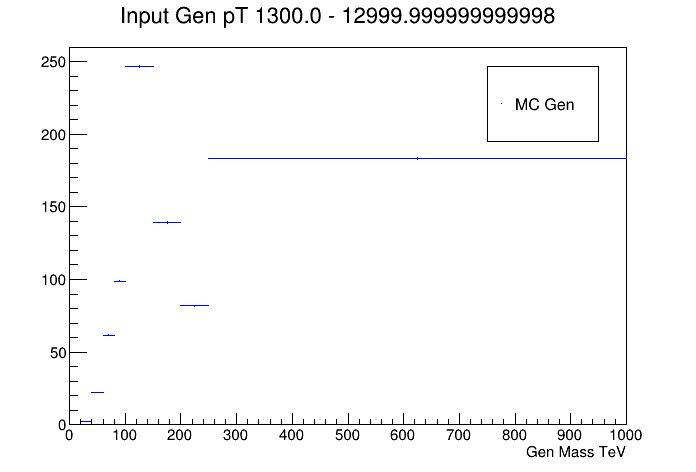

In [2]:
#### open files                                                                                                                                               
fname = "coffeaOutput/dijetHistsTest_wXSscaling_QCDsim_pt200.0_rapidity2.5_allUnc2018.pkl"
year = fname[-8:-4]
with open(fname, "rb") as f:
    result = pickle.load( f )
fname = "coffeaOutput/dijetHists_JetHT_pt200.0_rapidity2.5jesjecL1PU2016.pkl"
with open(fname, "rb") as f:
    result_data = pickle.load( f )
if "dijet" in fname:
    os_path = "plots/unfolding/dijet/statSumW2_test/"
else:
    os_path = "plots/unfolding/trijet/"
checkdir(os_path)
print(year)                                                                                                                                                    
# axis_names = [ax.name for ax in result['jet_pt_mass_reco_u'].axes]
axis_names = [ax.name for ax in result['ptreco_mreco_u'].axes]
print("avail hists ", result.keys())
print(axis_names)
# cats = [cat for cat in result['jet_pt_mass_reco_u'][{'ptreco':sum, 'dataset':sum, 'mreco':sum}].axes[0]]
# availSysts = [ax for ax in result['jet_pt_mass_reco_u'].project("syst").axes[0]]
cats = [cat for cat in result['ptreco_mreco_u'].project('ptreco','mreco').axes[0]]
availSysts = [ax for ax in result['ptreco_mreco_u'].project("syst").axes[0]]
print("Available systs ", availSysts)
detectorBinning, generatorBinning, mreco_edges, ptreco_edges, mgen_edges, ptgen_edges = setupBinning(result)
#### for data get results once                                                                                                                            
DataReco_u, DataReco_g = fillData(result_data, detectorBinning, mreco_edges, ptreco_edges, new=False)
syst_hist_dict = {}
#hist = getHists(result, "nominal", detectorBinning, generatorBinning)                                                                                    
#syst_hist_dict["nominal"]=hist                                                                                                                           
#for syst in [syst for syst in availSysts if ("Up" in syst)]:    
for syst in availSysts:  
    # ROOT.TH1.SetDefaultSumw2(True)
    #syst = syst[:-2]                                                                                                                                     
    hist = getHists(result, syst, detectorBinning, generatorBinning)
    syst_hist_dict[syst]=hist
    print("Building respone matrices for systematic ", syst)
    #### check that response matrix has been filled properly                                                                                              
    MCReco_u_M=hist['MCGenRec_u'].ProjectionY("MCReco ungroomed")
    MCTruth_u_M=hist['MCGenRec_u'].ProjectionX("MCTruth ungroomed")
    #MCReco_u_M.Print("all")                                                                                                                              
    MCReco_g_M=hist['MCGenRec_g'].ProjectionY("MCReco groomed")
    MCTruth_g_M=hist['MCGenRec_g'].ProjectionX("MCTruth groomed")
    plotinputsROOT(hist['MCGenRec_u'], hist['MCTruth_u'], hist['MCReco_u'], groom="ungroomed", syst=syst, year=year, ospath=os_path)
    plotinputsROOT(hist['MCGenRec_g'], hist['MCTruth_g'], hist['MCReco_g'], groom="groomed", syst=syst, year=year, ospath=os_path)
    #### plot inputs and check that they match matrix
hist_nom = syst_hist_dict["nominal"]
#### ADD RATIO PLOTS FOR ALL INPUT UNCERTAINTIES
# for syst in [syst for syst in availSysts if syst != "nominal"]:
#     hist = syst_hist_dict[syst]
syst = "nominal"
for ipt in range(len(ptgen_edges)-1):
    ci = ROOT.TCanvas("c" + str(ipt), "c" + str(ipt))
    ci.cd()
    hcopy = ROOT.TH1D("inputGenPt" + str(ipt), "Input Gen pT " + str(ptgen_edges[ipt]) +" - " +str(ptgen_edges[ipt+1]), len(mgen_edges)-1, mgen_edges)
    hcopy_M = ROOT.TH1D("inputMATRIXGenPt" + str(ipt), "InputMATRIX Gen pT " + str(ptgen_edges[ipt]) +" - " +str(ptgen_edges[ipt+1]), len(mgen_edges)
-1, mgen_edges )
    #        hcopy.Print("all") 
    canvs = []
    hists = []
    for im in range(len(mgen_edges)):
        # print("Bin value: ", hist['MCTruth_u'].GetBinContent(im+1+ipt*(len(mgen_edges)-1)), " for pt bin ", ipt, " and mass bin ", im, " ", mgen_edges[im])
        # print("Error value: ", np.sqrt(hist['MCTruth_u'].GetBinError(im+1+ipt*(len(mgen_edges)-1))), " from truth bin ", im+2+ipt*(len(mgen_edges)-1))
        hcopy.SetBinContent(im, hist['MCTruth_u'].GetBinContent(im+1+ipt*(len(mgen_edges)-1)))
        hcopy.SetBinError(im, hist['MCTruth_u'].GetBinError(im+1+ipt*(len(mgen_edges)-1)))                                                                                                                  
        hcopy.SetLineColor(ROOT.kBlue)
        hcopy.SetMarkerColor(ROOT.kBlue)
        hcopy.GetXaxis().SetTitle("Gen Mass TeV")
        hcopy.Draw()                                                                                                                           
        leg1 = ROOT.TLegend(0.7, 0.7, 0.86, 0.86)                                                                                                 
        leg1.AddEntry(hcopy, "MC Gen", "p")
        leg1.Draw()
        ci.Draw()                                                                                                                                        
        ci.SaveAs(os_path+"MCInput_ungroomed_"+syst+'_pt'+str(ptgen_edges[ipt])+"_"+year+".png")
        # ci.Close()
        #### add resp matrices and other hists to dictionary for final result                                                                             
        hists.append(hcopy)
        canvs.append(ci)


dict_keys(['nominal', 'jerUp', 'jerDown', 'AbsoluteMPFBiasUp', 'AbsoluteMPFBiasDown', 'AbsoluteScaleUp', 'AbsoluteScaleDown', 'AbsoluteStatUp', 'AbsoluteStatDown', 'FlavorQCDUp', 'FlavorQCDDown', 'FragmentationUp', 'FragmentationDown', 'PileUpDataMCUp', 'PileUpDataMCDown', 'PileUpPtBBUp', 'PileUpPtBBDown', 'PileUpPtEC1Up', 'PileUpPtEC1Down', 'PileUpPtEC2Up', 'PileUpPtEC2Down', 'PileUpPtHFUp', 'PileUpPtHFDown', 'PileUpPtRefUp', 'PileUpPtRefDown', 'RelativeFSRUp', 'RelativeFSRDown', 'RelativeJEREC1Up', 'RelativeJEREC1Down', 'RelativeJEREC2Up', 'RelativeJEREC2Down', 'RelativeJERHFUp', 'RelativeJERHFDown', 'RelativePtBBUp', 'RelativePtBBDown', 'RelativePtEC1Up', 'RelativePtEC1Down', 'RelativePtEC2Up', 'RelativePtEC2Down', 'RelativePtHFUp', 'RelativePtHFDown', 'RelativeBalUp', 'RelativeBalDown', 'RelativeSampleUp', 'RelativeSampleDown', 'RelativeStatECUp', 'RelativeStatECDown', 'RelativeStatFSRUp', 'RelativeStatFSRDown', 'RelativeStatHFUp', 'RelativeStatHFDown', 'SinglePionECALUp', 'SingleP

Info in <TUnfold::SetConstraint>: fConstraint=1
Warning in <TUnfold::TUnfold>: 27 output bins do not depend on the input data  2-3 11-14 24-25 37-39 50-51 62-63 74-75 86-88 98-99 110-111 122-123 134
Info in <TUnfold::TUnfold>: 264 input bins and 108 output bins (includes 1 underflow bin)
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #2 (xaxis:generator[1.5,2.5])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #3 (xaxis:generator[2.5,3.5])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #11 (xaxis:generator[10.5,11.5])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #12 (xaxis:generator[11.5,12.5])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #13 (xaxis:generator[12.5,13.5])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #14 (xaxis:generator[13.5,14.5])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #24 (xaxis:generator[23.5,24.5])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #25 (xaxis:generator[24.5,25.5])
Info in <TUnf

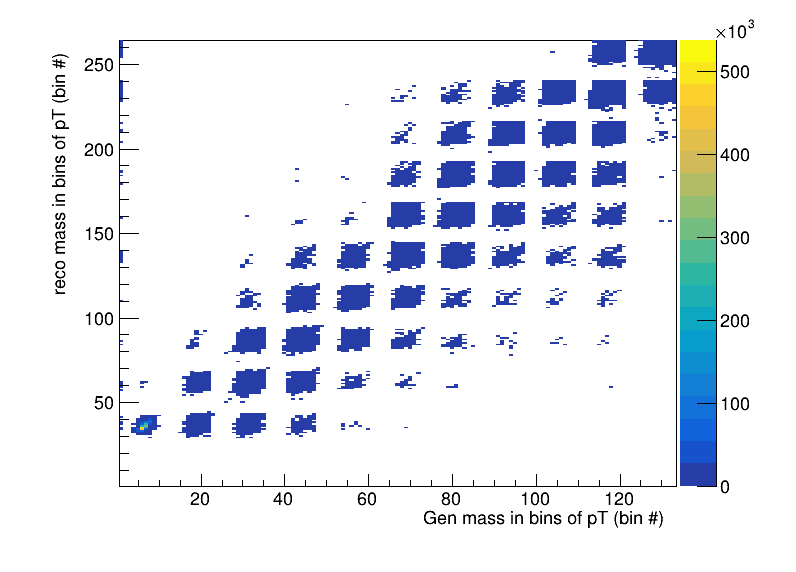

In [3]:
#### do unfolding
print(syst_hist_dict.keys())
M = syst_hist_dict["nominal"]["MCGenRec_u"]
h = syst_hist_dict["nominal"]["MCReco_u"]

orientation = ROOT.TUnfold.kHistMapOutputHoriz
regMode = ROOT.TUnfold.kRegModeCurvature
con = ROOT.TUnfold.kEConstraintArea #ROOT.TUnfold.kEConstraintArea
mode =  ROOT.TUnfoldDensity.kDensityModeBinWidth
axisSteering =  "*[b]"
#u = ROOT.TUnfoldDensity(M, orientation, regMode, con, mode, genBin, detBin, "signal", axisSteering)

u = ROOT.TUnfoldDensity(M,orientation,regMode,con)
u_test = ROOT.TUnfoldDensity(syst_hist_dict["jerUp"]["MCGenRec_u"],orientation,regMode,con)

u.SetInput( h )

u_test.SetInput(h)

for syst in [syst for syst in availSysts if syst!="nominal"]:
    u.AddSysError(syst_hist_dict[syst]["MCGenRec_u"], syst, orientation,  ROOT.TUnfoldDensity.kSysErrModeMatrix)
#u.AddSysError(M1, "Up", orientation, ROOT.TUnfoldDensity.kSysErrModeMatrix)
#u.AddSysError(M2, "Dn", orientation, ROOT.TUnfoldDensity.kSysErrModeMatrix)

#### Normalize response matrix (WIP)
response_norm = M.Clone("response_norm")
print("Starting resp integral ", response_norm.Integral(0,response_norm.GetNbinsX(),0,response_norm.GetNbinsY()))
resp_sum = 0.
resp_sum_norm = 0.
#### EDIT FOLLOWING CODE TO TAKE INTEGRAL OF EACH PT BIN CONTENT AND DIVIDE EACH INDIVIDUAL MASS BIN IN THAT RANGE BY THAT INTEGRAL
for ipt_g in range(1, len(ptgen_edges)-1):
    print("Summing gen pt bin ", ipt_g, " with value ", ptreco_edges[ipt_g])
    genbin0 = ipt_g*(len(mgen_edges)-1)
    genbin1 = (ipt_g+1)*(len(mgen_edges)-1)
    genbin_edge0 = ptgen_edges[ipt_g]
    genbin_edge1 = ptgen_edges[ipt_g+1]
    genbin_width = genbin_edge1 - genbin_edge0
    print("Root bin name ", generatorBinning.FindNode("gen").GetBinName(genbin0))
    print("Root bin size ", generatorBinning.FindNode("gen").GetBinSize(genbin0))
    for ipt_r in range(1, len(ptreco_edges)-1):
        print("Summing reco pt bin ", ipt_r, " with value ", ptreco_edges[ipt_r])
        recobin0 = ipt_g*(len(mgen_edges)-1)
        recobin1 = (ipt_g+1)*(len(mgen_edges)-1)
        recobin_edge0 = ptreco_edges[ipt_r]
        recobin_edge1 = ptreco_edges[ipt_r+1]
        recobin_width = recobin_edge1 - recobin_edge0
        print("Root bin name ", detectorBinning.FindNode("reco").GetBinName(recobin0))
        print("Root bin size ", detectorBinning.FindNode("reco").GetBinSize(recobin0))
        binsum = 1 #response_norm.Integral(genbin0,genbin1,recobin0,recobin1)
        binarea = genbin_width*recobin_width
        print("Bin sum ", binsum)
        print("Bin area ", binarea)
        resp_sum += binsum
        for im_g in range(len(mgen_edges)-1):
            ibinx = im_g+ipt_g*(len(mgen_edges)-1)
            for im_r in range(len(mreco_edges)-1):
                ibiny = im_r+ipt_r*(len(mreco_edges)-1)
                bincontent = response_norm.GetBinContent(ibinx,ibiny)
                if (binsum*binarea) > 0. :
                        bincontent = bincontent/(binsum*binarea)
                response_norm.SetBinContent(ibinx,ibiny,bincontent)
                resp_sum_norm += response_norm.GetBinContent(ibinx,ibiny)
print("Ending resp integral ", response_norm.Integral(0,response_norm.GetNbinsX(),0,response_norm.GetNbinsY()))

print("Starting resp integral ", resp_sum, " sum after normalizing ", resp_sum_norm)
# -------------------------------------------------------------------------------------
# Draw response matrix
# -------------------------------------------------------------------------------------

c1 = ROOT.TCanvas("c1", "", 800, 600)
c1.SetTopMargin(0.07)
c1.SetRightMargin(0.15)
c1.SetBottomMargin(0.15)
c1.SetLeftMargin(0.15) 

response_norm.SetTitle(";Gen mass in bins of pT (bin #);reco mass in bins of pT (bin #)")
response_norm.GetZaxis()
response_norm.Draw("colz")

c1.Draw()
c1.SaveAs(os_path+"RespMatrixNORM_ungroomed_nominal"+year+".png")

In [4]:
nScan=50
tauMin=0.0
tauMax=0.0
iBest=0

logTauX = ROOT.MakeNullPointer(ROOT.TSpline)
logTauY = ROOT.MakeNullPointer(ROOT.TSpline)
lCurve = ROOT.MakeNullPointer(ROOT.TGraph)
u.ScanLcurve(nScan,tauMin,tauMax,lCurve,logTauX,logTauY)
# u.DoUnfold(0.0)
cov = u.GetEmatrixTotal("cov", "Covariance Matrix")
#cov = u.GetEmatrixTotal("ematrix","Covariance Matrix", "signal", "*[]", False)

cov_uncorr = u.GetEmatrixSysUncorr("cov_uncorr", "Covariance Matrix from Uncorrelated Uncertainties")
cov_uncorr_data = u.GetEmatrixInput("cov_uncorr_data", "Covariance Matrix from Stat Uncertainties of Input Data")


Info in <TUnfoldDensity::ScanLcurve>: logtau=-Infinity X=0.174943 Y=13.303540
Info in <TUnfoldDensity::ScanLcurve>: logtau=-5.925655 X=0.467863 Y=13.228653
Info in <TUnfoldDensity::ScanLcurve>: logtau=-6.425655 X=0.190483 Y=13.285240
Info in <TUnfoldDensity::ScanLcurve>: logtau=-6.925655 X=0.175144 Y=13.301389
Info in <TUnfoldDensity::ScanLcurve>: logtau=-6.175655 X=0.264714 Y=13.261006
Info in <TUnfoldDensity::ScanLcurve>: logtau=-6.050655 X=0.348820 Y=13.245209
Info in <TUnfoldDensity::ScanLcurve>: logtau=-5.988155 X=0.403995 Y=13.236992
Info in <TUnfoldDensity::ScanLcurve>: logtau=-6.113155 X=0.302325 Y=13.253266
Info in <TUnfoldDensity::ScanLcurve>: logtau=-6.300655 X=0.214729 Y=13.274736
Info in <TUnfoldDensity::ScanLcurve>: logtau=-5.956905 X=0.434814 Y=13.232842
Info in <TUnfoldDensity::ScanLcurve>: logtau=-6.019405 X=0.375335 Y=13.241115
Info in <TUnfoldDensity::ScanLcurve>: logtau=-6.238155 X=0.235798 Y=13.268225
Info in <TUnfoldDensity::ScanLcurve>: logtau=-6.081905 X=0.32447

In [5]:
#### NEED TO EDIT AND IMPLEMENT FOLLOWING CODE BLOCK TO ACCOUNT FOR FAKES 
# # Scale down 'ttbar' part of measurement to account for fake fraction, as given by response matrix
# for ii in xrange(1,response.GetNbinsX()+1):
#     if response.Integral(ii,ii,0,response.GetNbinsY()+1) > 0.0 :
#         fakefraction = response.GetBinContent(ii,0) / response.Integral(ii,ii,0,response.GetNbinsY()+1)
#         measurement.SetBinContent(ii,measurement.GetBinContent(ii)*(1.0-fakefraction))
#         measurement.SetBinError(ii,measurement.GetBinError(ii)*(1.0-fakefraction))
#         response.SetBinContent(ii,0,0)
#         response.SetBinError(ii,0,0)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: png file plots/unfolding/dijet/statSumW2_test/RespMatrix_ungroomed_nominal2018.png has been created


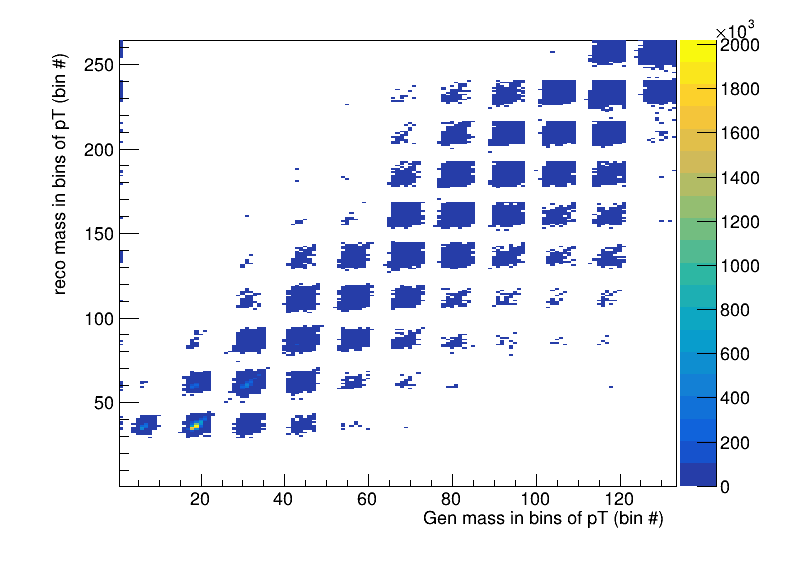

In [6]:
# -------------------------------------------------------------------------------------
# Draw response matrix
# -------------------------------------------------------------------------------------

c1 = ROOT.TCanvas("c1", "", 800, 600)
c1.SetTopMargin(0.07)
c1.SetRightMargin(0.15)
c1.SetBottomMargin(0.15)
c1.SetLeftMargin(0.15) 

M.SetTitle(";Gen mass in bins of pT (bin #);reco mass in bins of pT (bin #)")
M.GetZaxis()
M.Draw("colz")

c1.Draw()
c1.SaveAs(os_path+"RespMatrix_ungroomed_nominal"+year+".png")

In [7]:
o = u.GetOutput("o")

Warning in <TLegend::Paint>: Legend too large to be automatically placed; a default position is used


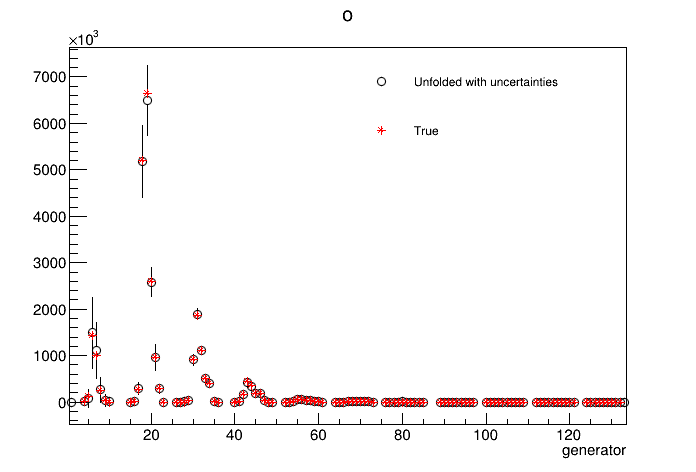

In [8]:
o.SetMarkerStyle(4)
o.SetLineColor(ROOT.kBlack)

htrue = syst_hist_dict["nominal"]["MCTruth_u"]

htrue.SetMarkerStyle(3)
htrue.SetMarkerColor(2)

a = ROOT.TCanvas()
o.Draw("e")
htrue.Draw("e same")
leg = ROOT.TLegend(0.9,0.9,0.9,0.9)
legstr = "Unfolded with uncertainties"
leg.AddEntry(o, legstr, "p")
leg.AddEntry(htrue, "True", "p")
leg.SetBorderSize(0)
leg.Draw()

#o.Draw("same")
a.Draw()
# a.SaveAs(os_path+"UnfoldingOutput_ungroomed_allUnc_allbins"+year+".png")

In [9]:
syst_uncorr = [
    'AbsoluteStatUp',
    'AbsoluteStatDown',
    'RelativeJEREC1Up',
    'RelativeJEREC1Down',
    'RelativeJEREC2Up',
    'RelativeJEREC2Down',
    'RelativePtEC1Up',
    'RelativePtEC1Down',
    'RelativePtEC2Up',
    'RelativePtEC2Down',
    'RelativeSampleUp',
    'RelativeSampleDown',
    'RelativeStatECUp',
    'RelativeStatECDown',
    'RelativeStatFSRUp',
    'RelativeStatFSRDown',
    'TimePtEtaUp',
    'TimePtEtaDown'
]
syst_list = [syst for syst in availSysts if syst!="nominal"]
print(syst_list)

['jerUp', 'jerDown', 'AbsoluteMPFBiasUp', 'AbsoluteMPFBiasDown', 'AbsoluteScaleUp', 'AbsoluteScaleDown', 'AbsoluteStatUp', 'AbsoluteStatDown', 'FlavorQCDUp', 'FlavorQCDDown', 'FragmentationUp', 'FragmentationDown', 'PileUpDataMCUp', 'PileUpDataMCDown', 'PileUpPtBBUp', 'PileUpPtBBDown', 'PileUpPtEC1Up', 'PileUpPtEC1Down', 'PileUpPtEC2Up', 'PileUpPtEC2Down', 'PileUpPtHFUp', 'PileUpPtHFDown', 'PileUpPtRefUp', 'PileUpPtRefDown', 'RelativeFSRUp', 'RelativeFSRDown', 'RelativeJEREC1Up', 'RelativeJEREC1Down', 'RelativeJEREC2Up', 'RelativeJEREC2Down', 'RelativeJERHFUp', 'RelativeJERHFDown', 'RelativePtBBUp', 'RelativePtBBDown', 'RelativePtEC1Up', 'RelativePtEC1Down', 'RelativePtEC2Up', 'RelativePtEC2Down', 'RelativePtHFUp', 'RelativePtHFDown', 'RelativeBalUp', 'RelativeBalDown', 'RelativeSampleUp', 'RelativeSampleDown', 'RelativeStatECUp', 'RelativeStatECDown', 'RelativeStatFSRUp', 'RelativeStatFSRDown', 'RelativeStatHFUp', 'RelativeStatHFDown', 'SinglePionECALUp', 'SinglePionECALDown', 'Single

In [10]:
# def getOutputUnc(o, u, syst_list, syst_uncorr): 
oSys = o.Clone("Systematic")
oInput = o.Clone("Input stat")
oMat = o.Clone("Matrix stat")
oTotal  = o.Clone("Total unc")

mCovInput = u.GetEmatrixInput("Input unc")
mCovUncorr = u.GetEmatrixSysUncorr("Matric unc")


for i in range(1, o.GetNbinsX()+1):
    oSys.SetBinError(i, 0)
systErr = {}  

for syst in syst_list:
    if syst not in syst_uncorr[:]:
        systErr.update({syst: u.GetDeltaSysSource(syst,  syst+'Err')})
        for i in range(1, o.GetNbinsX()+1):
            oSys.SetBinError(i, oSys.GetBinError(i) + pow(systErr[syst].GetBinContent(i), 2) )

        
for i in range(1, o.GetNbinsX()+1):
    oSys.SetBinError(i, oSys.GetBinError(i)**0.5 )
    
for syst in syst_uncorr:
    systErr.update({syst: u.GetDeltaSysSource(syst,  syst+'Err')})
    for i in range(1, o.GetNbinsX()+1):
        oSys.SetBinError(i, oSys.GetBinError(i) + abs(systErr[syst].GetBinContent(i)))




for i in range(1, o.GetNbinsX()+1):
    inputErr = mCovInput.GetBinContent(i,i)**0.5
    matrixErr = mCovUncorr.GetBinContent(i,i)**0.5
    oInput.SetBinError(i, inputErr )
    oMat.SetBinError(i,  matrixErr )
    oTotal.SetBinError(i, np.sqrt( oSys.GetBinError(i)**2 + oInput.GetBinError(i)**2 + oMat.GetBinError(i)**2 ))
for i in range(1, o.GetNbinsX()+1):    
    oTotal.SetBinError(i, np.sqrt( oSys.GetBinError(i)**2 + oInput.GetBinError(i)**2 + oMat.GetBinError(i)**2 ))

In [11]:
# getOutputUnc(o, u, syst_list, syst_uncorr)

Warning in <TLegend::Paint>: Legend too large to be automatically placed; a default position is used
Info in <TCanvas::Print>: png file plots/unfolding/dijet/statSumW2_test/UnfoldingOutput_ungroomed_inputStat_allbins2018.png has been created


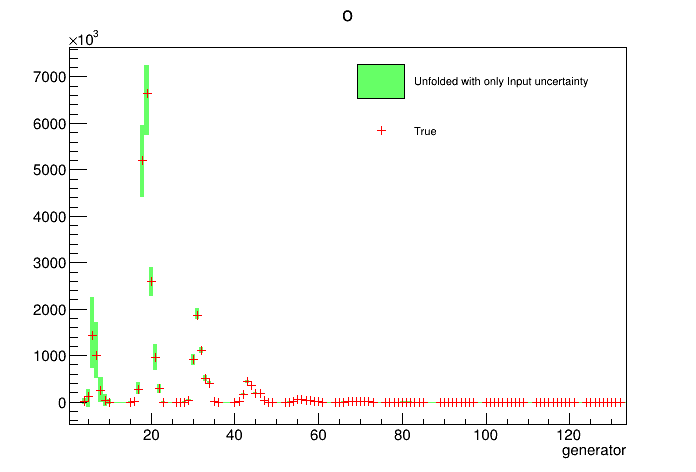

In [12]:
oInput.SetMarkerStyle(0)
oInput.SetLineColor(ROOT.kBlack)
oInput.SetFillColor(ROOT.kGreen-7)

htrue.SetMarkerStyle(2)
htrue.SetMarkerColor(2)

a = ROOT.TCanvas()
oInput.Draw("e2")
htrue.Draw("e same")
leg = ROOT.TLegend(0.9,0.9,0.9,0.9)
legstr = "Unfolded with only Input uncertainty"
leg.AddEntry(oInput, legstr, "f")
leg.AddEntry(htrue, "True", "p")
leg.SetBorderSize(0)
leg.Draw()
a.SaveAs
#o.Draw("same")
a.Draw()
a.SaveAs(os_path+"UnfoldingOutput_ungroomed_inputStat_allbins"+year+".png")

Warning in <TLegend::Paint>: Legend too large to be automatically placed; a default position is used
Info in <TCanvas::Print>: png file plots/unfolding/dijet/statSumW2_test/UnfoldingOutput_ungroomed_matrixUnc_allbins2018.png has been created


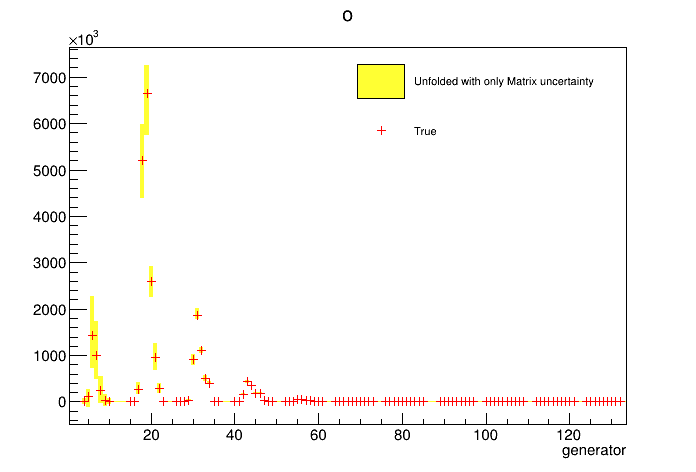

In [13]:
oMat.SetMarkerStyle(0)
oMat.SetLineColor(ROOT.kBlack)
oMat.SetFillColor(ROOT.kYellow-4)




htrue.SetMarkerStyle(2)
htrue.SetMarkerColor(2)

a = ROOT.TCanvas()
oMat.Draw("e2")
htrue.Draw("e same")
leg = ROOT.TLegend(0.9,0.9,0.9,0.9)
legstr = "Unfolded with only Matrix uncertainty"
leg.AddEntry(oMat, legstr, "f")
leg.AddEntry(htrue, "True", "p")
leg.SetBorderSize(0)
leg.Draw()

#o.Draw("same")
a.Draw()
a.SaveAs(os_path+"UnfoldingOutput_ungroomed_matrixUnc_allbins"+year+".png")

Warning in <TROOT::Append>: Replacing existing TH1: Input unc (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Matric unc (Potential memory leak).
Warning in <TLegend::Paint>: Legend too large to be automatically placed; a default position is used
Info in <TCanvas::Print>: png file plots/unfolding/dijet/statSumW2_test/UnfoldingOutput_ungroomed_allUnc_allbins2018.png has been created


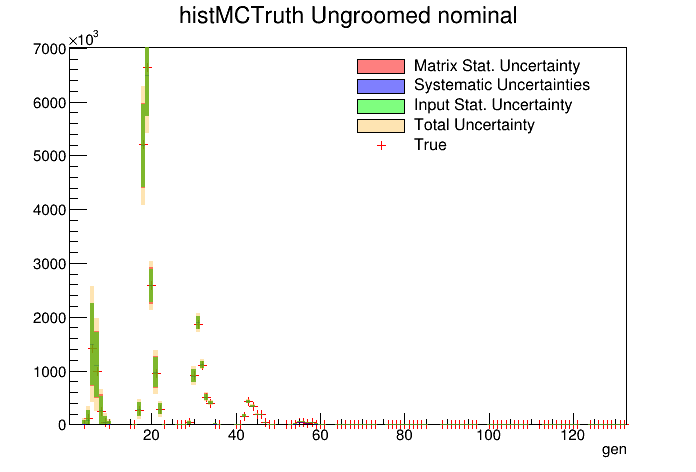

In [14]:
# def plotOutputUncPretty(o):
oInput = o.Clone("Input stat")
oMat = o.Clone("Matrix stat")
oTotal  = o.Clone("Total unc")


mCovInput = u.GetEmatrixInput("Input unc")
mCovUncorr = u.GetEmatrixSysUncorr("Matric unc")

for i in range(1, o.GetNbinsX()+1):
    oInput.SetBinError(i, mCovInput.GetBinContent(i,i)**0.5 )
    oMat.SetBinError(i, mCovUncorr.GetBinContent(i,i)**0.5 )    
    oTotal.SetBinError(i, np.sqrt( oSys.GetBinError(i)**2 + oInput.GetBinError(i)**2 + oMat.GetBinError(i)**2 ))
oSys.SetMarkerStyle(0)
oSys.SetLineColor(ROOT.kBlack)
oSys.SetFillColor(ROOT.kBlue-7)
oSys.SetFillColorAlpha(ROOT.kBlue, 0.5)

oInput.SetMarkerStyle(0)
oInput.SetLineColor(ROOT.kBlack)
oInput.SetFillColorAlpha(ROOT.kGreen, 0.5)




oTotal.SetMarkerStyle(0)
oTotal.SetLineColor(ROOT.kBlack)
oTotal.SetFillColorAlpha(ROOT.kOrange-4, 0.5)

oMat.SetMarkerStyle(0)
oMat.SetLineColor(ROOT.kBlack)
oMat.SetFillColorAlpha(ROOT.kRed, 0.5)

htrue.SetMarkerStyle(2)
htrue.SetMarkerColor(2)

a = ROOT.TCanvas()
htrue.Draw("e")

oTotal.Draw("e2 same")
oSys.Draw("e2 same")
oMat.Draw("e2 same")
oInput.Draw("e2 same")



leg = ROOT.TLegend(0.9,0.9,0.9,0.9)

leg.AddEntry(oMat, "Matrix Stat. Uncertainty", "f")
leg.AddEntry(oSys, "Systematic Uncertainties", "f")
leg.AddEntry(oInput, "Input Stat. Uncertainty", "f")
leg.AddEntry(oTotal, "Total Uncertainty", "f")
leg.AddEntry(htrue, "True", "p")
leg.SetBorderSize(0)
leg.Draw()

#o.Draw("same")
a.Draw()
a.SaveAs(os_path+"UnfoldingOutput_ungroomed_allUnc_allbins"+year+".png")

Warning in <TROOT::Append>: Replacing existing TH1: hTruePt0 (Potential memory leak).
Info in <TCanvas::Print>: png file plots/unfolding/dijet/statSumW2_test/UnfoldedClosure_ungroomed_sepUnc_pt0.0_2018.png has been created
Warning in <TROOT::Append>: Replacing existing TH1: hTruePt1 (Potential memory leak).
Info in <TCanvas::Print>: png file plots/unfolding/dijet/statSumW2_test/UnfoldedClosure_ungroomed_sepUnc_pt200.0_2018.png has been created
Warning in <TROOT::Append>: Replacing existing TH1: hTruePt2 (Potential memory leak).
Info in <TCanvas::Print>: png file plots/unfolding/dijet/statSumW2_test/UnfoldedClosure_ungroomed_sepUnc_pt280.0_2018.png has been created
Warning in <TROOT::Append>: Replacing existing TH1: hTruePt3 (Potential memory leak).
Info in <TCanvas::Print>: png file plots/unfolding/dijet/statSumW2_test/UnfoldedClosure_ungroomed_sepUnc_pt360.0_2018.png has been created
Warning in <TROOT::Append>: Replacing existing TH1: hTruePt4 (Potential memory leak).
Info in <TCanvas

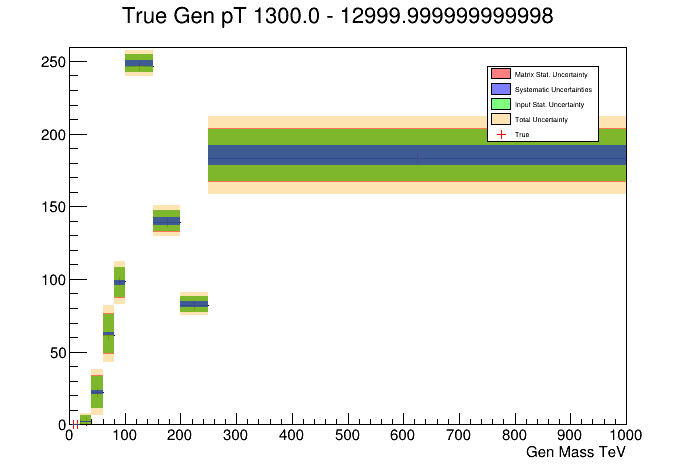

In [28]:
canvs = []
hists = []
for ipt in range(len(ptgen_edges)-1):
    ci = ROOT.TCanvas("c" + str(ipt), "c" + str(ipt))
    ci.cd()
    syscopy = ROOT.TH1D("systUncPt" + str(ipt), "Syst Gen pT " + str(ptgen_edges[ipt]) +" - " +str(ptgen_edges[ipt+1]), len(mgen_edges)-1, mgen_edges)
    inputcopy = ROOT.TH1D("inputUncPt" + str(ipt), "Input unc. Gen pT " + str(ptgen_edges[ipt]) +" - " +str(ptgen_edges[ipt+1]), len(mgen_edges)-1, mgen_edges)
    matcopy = ROOT.TH1D("matUncPt" + str(ipt), "Matrix Gen pT " + str(ptgen_edges[ipt]) +" - " +str(ptgen_edges[ipt+1]), len(mgen_edges)-1, mgen_edges)
    totcopy = ROOT.TH1D("totUncPt" + str(ipt), "Total Gen pT " + str(ptgen_edges[ipt]) +" - " +str(ptgen_edges[ipt+1]), len(mgen_edges)-1, mgen_edges)
    hcopy = ROOT.TH1D("hTruePt" + str(ipt), "True Gen pT " + str(ptgen_edges[ipt]) +" - " +str(ptgen_edges[ipt+1]), len(mgen_edges)-1, mgen_edges)
#        hcopy.Print("all") 
    canvs = []
    hists = []
    for im in range(len(mgen_edges)):
        syscopy.SetBinContent(im, oSys.GetBinContent(im+1+ipt*(len(mgen_edges)-1)))
        syscopy.SetBinError(im, oSys.GetBinError(im+1+ipt*(len(mgen_edges)-1))) 
        syscopy.SetMarkerStyle(0)
        syscopy.SetLineColor(ROOT.kBlack)
        syscopy.SetFillColor(ROOT.kBlue-7)
        syscopy.SetFillColorAlpha(ROOT.kBlue, 0.5)
        inputcopy.SetBinContent(im, oInput.GetBinContent(im+1+ipt*(len(mgen_edges)-1)))
        inputcopy.SetBinError(im, oInput.GetBinError(im+1+ipt*(len(mgen_edges)-1))) 
        inputcopy.SetMarkerStyle(0)
        inputcopy.SetLineColor(ROOT.kBlack)
        inputcopy.SetFillColorAlpha(ROOT.kGreen, 0.5)
        matcopy.SetBinContent(im, oMat.GetBinContent(im+1+ipt*(len(mgen_edges)-1)))
        matcopy.SetBinError(im, oMat.GetBinError(im+1+ipt*(len(mgen_edges)-1))) 
        matcopy.SetMarkerStyle(0)
        matcopy.SetLineColor(ROOT.kBlack)
        matcopy.SetFillColorAlpha(ROOT.kRed, 0.5)
        totcopy.SetBinContent(im, oTotal.GetBinContent(im+1+ipt*(len(mgen_edges)-1)))
        totcopy.SetBinError(im, oTotal.GetBinError(im+1+ipt*(len(mgen_edges)-1))) 
        totcopy.SetMarkerStyle(0)
        totcopy.SetLineColor(ROOT.kBlack)
        totcopy.SetFillColorAlpha(ROOT.kOrange-4, 0.5)
        hcopy.SetBinContent(im, htrue.GetBinContent(im+1+ipt*(len(mgen_edges)-1)))
        hcopy.SetBinError(im, htrue.GetBinError(im+1+ipt*(len(mgen_edges)-1)))                                                                                                                   
        hcopy.SetMarkerStyle(2)
        hcopy.SetMarkerColor(2)
        hcopy.GetXaxis().SetTitle("Gen Mass TeV")
        
    hcopy.Draw("e")
    totcopy.Draw("e2 same")
    matcopy.Draw("e2 same")
    inputcopy.Draw("e2 same")
    syscopy.Draw("e2 same")                                                                                                                          
    leg1 = ROOT.TLegend(0.7, 0.7, 0.86, 0.86)                                                                                                    
    leg1.AddEntry(matcopy, "Matrix Stat. Uncertainty", "f")
    leg1.AddEntry(syscopy, "Systematic Uncertainties", "f")
    leg1.AddEntry(inputcopy, "Input Stat. Uncertainty", "f")
    leg1.AddEntry(totcopy, "Total Uncertainty", "f")
    leg1.AddEntry(hcopy, "True", "p")
    leg1.Draw()
    ci.Draw()                                                                                                                                        
    hist[hcopy.GetName()]=hcopy
    ci.SaveAs(os_path+"UnfoldedClosure_ungroomed_sepUnc_pt"+str(ptgen_edges[ipt])+"_"+year+".png")
    canvs.append(ci)
    hists.append(hcopy)
print(hists)

Info in <TCanvas::Print>: png file plots/unfolding/dijet/statSumW2_test/UnfoldedClosure_ungroomed_allUnc_pt0.0_2018.png has been created
Info in <TCanvas::Print>: png file plots/unfolding/dijet/statSumW2_test/UnfoldedClosure_ungroomed_allUnc_pt200.0_2018.png has been created
Info in <TCanvas::Print>: png file plots/unfolding/dijet/statSumW2_test/UnfoldedClosure_ungroomed_allUnc_pt280.0_2018.png has been created
Info in <TCanvas::Print>: png file plots/unfolding/dijet/statSumW2_test/UnfoldedClosure_ungroomed_allUnc_pt360.0_2018.png has been created
Info in <TCanvas::Print>: png file plots/unfolding/dijet/statSumW2_test/UnfoldedClosure_ungroomed_allUnc_pt450.0_2018.png has been created
Info in <TCanvas::Print>: png file plots/unfolding/dijet/statSumW2_test/UnfoldedClosure_ungroomed_allUnc_pt520.0_2018.png has been created
Info in <TCanvas::Print>: png file plots/unfolding/dijet/statSumW2_test/UnfoldedClosure_ungroomed_allUnc_pt630.0_2018.png has been created
Info in <TCanvas::Print>: png

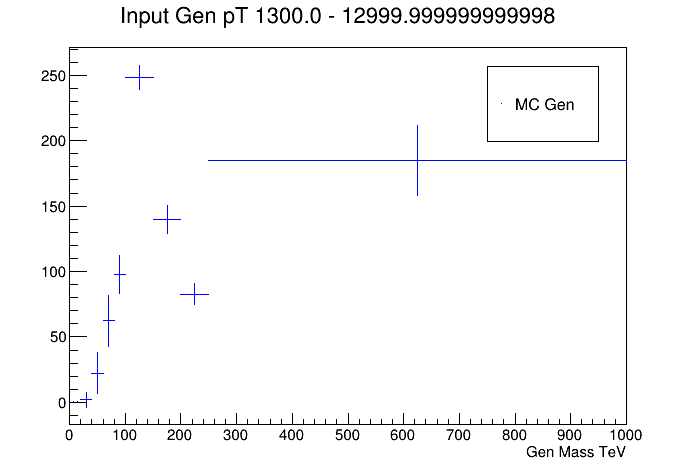

In [29]:
canvs = []
hists = []
for ipt in range(len(ptgen_edges)-1):
    ci = ROOT.TCanvas("c" + str(ipt), "c" + str(ipt))
    ci.cd()
    hcopy = ROOT.TH1D("inputGenPt" + str(ipt), "Input Gen pT " + str(ptgen_edges[ipt]) +" - " +str(ptgen_edges[ipt+1]), len(mgen_edges)-1, mgen_edges)
    hcopy_M = ROOT.TH1D("inputMATRIXGenPt" + str(ipt), "InputMATRIX Gen pT " + str(ptgen_edges[ipt]) +" - " +str(ptgen_edges[ipt+1]), len(mgen_edges)
-1, mgen_edges )
#        hcopy.Print("all") 
    canvs = []
    hists = []
    for im in range(len(mgen_edges)):
        hcopy.SetBinContent(im, o.GetBinContent(im+1+ipt*(len(mgen_edges)-1)))
        hcopy.SetBinError(im, oTotal.GetBinError(im+1+ipt*(len(mgen_edges)-1)))                                                                                                                   
    hcopy.SetLineColor(ROOT.kBlue)
    hcopy.SetMarkerColor(ROOT.kBlue)
    hcopy.GetXaxis().SetTitle("Gen Mass TeV")
    hcopy.Draw()                                                                                                                           
    leg1 = ROOT.TLegend(0.7, 0.7, 0.86, 0.86)                                                                                                    
    leg1.AddEntry(hcopy, "MC Gen", "p")
    leg1.Draw()
    ci.Draw()                                                                                                                                        
    hist[hcopy.GetName()]=hcopy
    ci.SaveAs(os_path+"UnfoldedClosure_ungroomed_allUnc_pt"+str(ptgen_edges[ipt])+"_"+year+".png")
    canvs.append(ci)
    hists.append(hcopy)
print(hists)

In [30]:
oSysFrac = o.Clone("Fractional")
oInputFrac = o.Clone("Fractiona inputl")
oMatFrac = o.Clone("Fractional matrix")
oTotalFrac = o.Clone("Fractional total")
for i in range(1, o.GetNbinsX()+1):
    oSysFrac.SetBinContent(i, 1)
    oInputFrac.SetBinContent(i, 1)
    oMatFrac.SetBinContent(i, 1)
    oTotalFrac.SetBinContent(i, 1)
    if o.GetBinContent(i) <0.01:
        oSysFrac.SetBinError(i, 0)
        oInputFrac.SetBinError(i, 0 )
        oMatFrac.SetBinError(i, 0)
        oTotalFrac.SetBinError(i, 0)
    else:
        oSysFrac.SetBinError(i, oSys.GetBinError(i)/o.GetBinContent(i))
        oInputFrac.SetBinError(i, oInput.GetBinError(i)/o.GetBinContent(i))
        oMatFrac.SetBinError(i, oMat.GetBinError(i)/o.GetBinContent(i))
        oTotalFrac.SetBinError(i, oTotal.GetBinError(i)/o.GetBinContent(i))

Info in <TCanvas::Print>: png file plots/unfolding/dijet/statSumW2_test/UnfoldingOutput_ungroomed_fracErr_allbins2018.png has been created


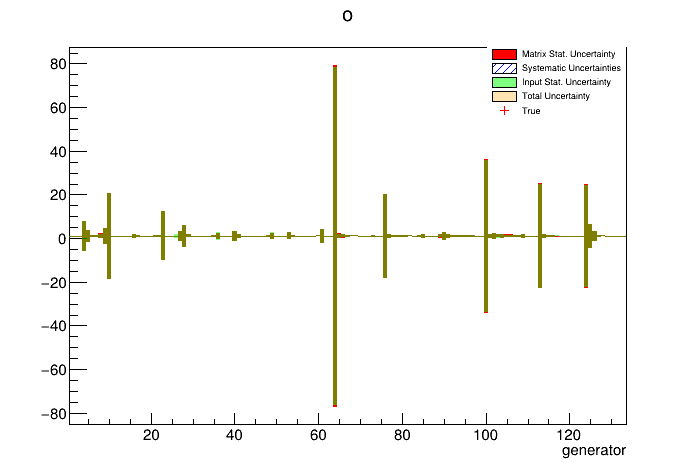

In [31]:
oSysFrac.SetMarkerStyle(0)
oSysFrac.SetLineColor(ROOT.kBlack)
oSysFrac.SetFillColor(ROOT.kBlue-7)
oSysFrac.SetFillColorAlpha(ROOT.kBlue, 1)
oSysFrac.SetFillStyle(3004)

oInputFrac.SetMarkerStyle(0)
oInputFrac.SetLineColor(ROOT.kBlack)
#oInputFrac.SetFillStyle(3000)
oInputFrac.SetFillColorAlpha(ROOT.kGreen, 0.5)





oTotalFrac.SetMarkerStyle(0)
oTotalFrac.SetLineColor(ROOT.kBlack)
oTotalFrac.SetFillColorAlpha(ROOT.kOrange-4, 0.5)

oMatFrac.SetMarkerStyle(0)
oMatFrac.SetLineColor(ROOT.kBlack)

oMatFrac.SetFillColorAlpha(ROOT.kRed, 1)


htrue.SetMarkerStyle(2)
htrue.SetMarkerColor(2)

a = ROOT.TCanvas()



oMatFrac.Draw("e2 same")
oInputFrac.Draw("e2 same")

leg = ROOT.TLegend(0.7, 0.75, 0.9, 0.9)

leg.AddEntry(oMatFrac, "Matrix Stat. Uncertainty", "f")
leg.AddEntry(oSysFrac, "Systematic Uncertainties", "f")
leg.AddEntry(oInputFrac, "Input Stat. Uncertainty", "f")
leg.AddEntry(oTotalFrac, "Total Uncertainty", "f")
leg.AddEntry(htrue, "True", "p")
leg.SetBorderSize(0)
leg.Draw()

#o.Draw("same")
a.Draw()
a.SaveAs(os_path+"UnfoldingOutput_ungroomed_fracErr_allbins"+year+".png")

In [32]:
for i in range(60,70):
    print(i)
    print("Value: ",oSys.GetBinContent(i))
    print("Error: ",oInput.GetBinError(i))

60
Value:  2462.3173032779196
Error:  495.53098266762345
61
Value:  51.15995992783078
Error:  156.24166736411507
62
Value:  0.0
Error:  0.0
63
Value:  0.0
Error:  0.0
64
Value:  2.5389318148637616
Error:  196.48297508566102
65
Value:  20.640003466813678
Error:  20.735346306934304
66
Value:  1191.2221768166676
Error:  816.0864340390232
67
Value:  5538.878051285546
Error:  1490.6704177091385
68
Value:  7608.59284906936
Error:  1852.239717126726
69
Value:  5873.411232046674
Error:  1338.5954371943299


In [33]:
from ROOT import kBlack, kBlue, kRed, kGreen, kYellow, kMagenta, kCyan, kOrange, kGray

color_list = []
base_colors = [kBlack, kBlue, kRed, kGreen, kYellow, kMagenta, kCyan, kOrange]

# Loop and alternate base colors with lighter/darker shades
for i in range(30):
    index = i % len(base_colors)  # Cycle through base colors
    color = base_colors[index]
    if i % 2 == 0:  # Lighter shade for even indices
        color += 5
    else:  # Darker shade for odd indices
        color -= 5
    color_list.append(color)

In [34]:
for key in syst_list:
    for i in range(1, o.GetNbinsX()+1):
        systErr[key].SetBinContent(i, abs(systErr[key].GetBinContent(i)))
    

In [35]:
myStack = ROOT.THStack("errStack", "Stacked Errors")
for i,key in enumerate(syst_list[::2]):
    print(key)
    systErr[key].SetLineColor(color_list[i])
    myStack.Add(systErr[key])

jerUp
AbsoluteMPFBiasUp
AbsoluteScaleUp
AbsoluteStatUp
FlavorQCDUp
FragmentationUp
PileUpDataMCUp
PileUpPtBBUp
PileUpPtEC1Up
PileUpPtEC2Up
PileUpPtHFUp
PileUpPtRefUp
RelativeFSRUp
RelativeJEREC1Up
RelativeJEREC2Up
RelativeJERHFUp
RelativePtBBUp
RelativePtEC1Up
RelativePtEC2Up
RelativePtHFUp
RelativeBalUp
RelativeSampleUp
RelativeStatECUp
RelativeStatFSRUp
RelativeStatHFUp
SinglePionECALUp
SinglePionHCALUp
TimePtEtaUp


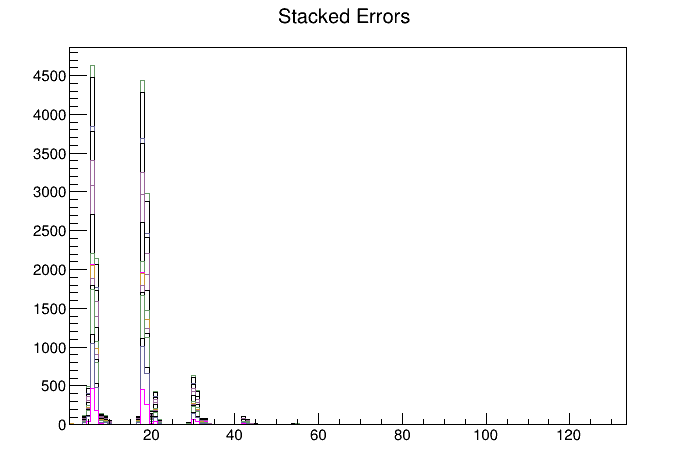

In [36]:
c3 = ROOT.TCanvas()
myStack.Draw()
c3.Draw()

In [37]:
print(u.GetSysSources())

{ @0x7ff7b6b80df8, @0x7ff7b6b80df8, @0x7ff7b6b80df8, @0x7ff7b6b80df8, @0x7ff7b6b80df8, @0x7ff7b6b80df8, @0x7ff7b6b80df8, @0x7ff7b6b80df8, @0x7ff7b6b80df8, @0x7ff7b6b80df8, @0x7ff7b6b80df8, @0x7ff7b6b80df8, @0x7ff7b6b80df8, @0x7ff7b6b80df8, @0x7ff7b6b80df8, @0x7ff7b6b80df8, @0x7ff7b6b80df8, @0x7ff7b6b80df8, @0x7ff7b6b80df8, @0x7ff7b6b80df8, @0x7ff7b6b80df8, @0x7ff7b6b80df8, @0x7ff7b6b80df8, @0x7ff7b6b80df8, @0x7ff7b6b80df8, @0x7ff7b6b80df8, @0x7ff7b6b80df8, @0x7ff7b6b80df8, @0x7ff7b6b80df8, @0x7ff7b6b80df8, @0x7ff7b6b80df8, @0x7ff7b6b80df8, @0x7ff7b6b80df8, @0x7ff7b6b80df8, @0x7ff7b6b80df8, @0x7ff7b6b80df8, @0x7ff7b6b80df8, @0x7ff7b6b80df8, @0x7ff7b6b80df8, @0x7ff7b6b80df8, @0x7ff7b6b80df8, @0x7ff7b6b80df8, @0x7ff7b6b80df8, @0x7ff7b6b80df8, @0x7ff7b6b80df8, @0x7ff7b6b80df8, @0x7ff7b6b80df8, @0x7ff7b6b80df8, @0x7ff7b6b80df8, @0x7ff7b6b80df8, @0x7ff7b6b80df8, @0x7ff7b6b80df8, @0x7ff7b6b80df8, @0x7ff7b6b80df8, @0x7ff7b6b80df8, @0x7ff7b6b80df8 }


In [38]:
u_test.DoUnfold(0.0)

0.9994501973252451

In [39]:
o_test = u_test.GetOutput("jer variation test")

Warning in <TLegend::Paint>: Legend too large to be automatically placed; a default position is used


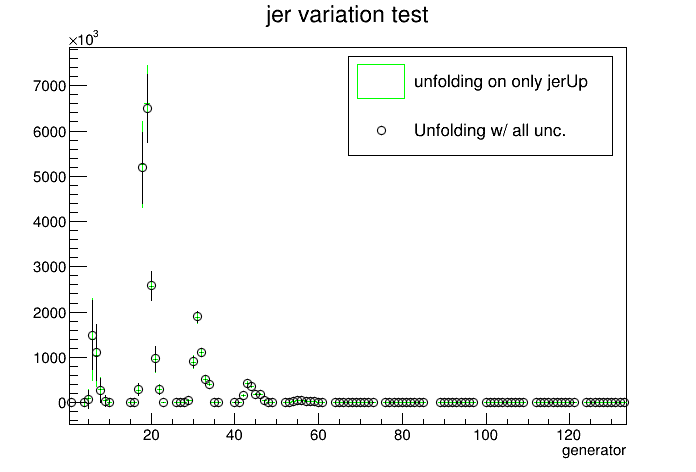

In [40]:

c4 = ROOT.TCanvas()
o_test.SetLineColor(3)
o_test.Draw()
o.Draw("same")
leg = ROOT.TLegend(0.9,0.9,0.9,0.9)
leg.AddEntry(o_test, "unfolding on only jerUp", "f")
leg.AddEntry(o, "Unfolding w/ all unc.", "p")
leg.Draw()
c4.Draw()


Warning in <TLegend::Paint>: Legend too large to be automatically placed; a default position is used


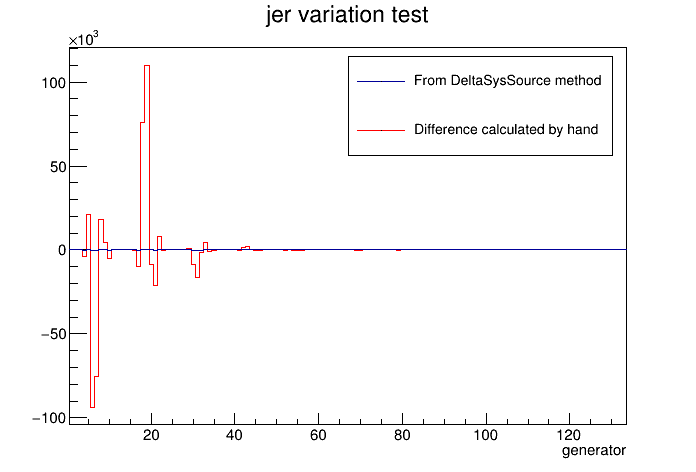

In [41]:
c4 = ROOT.TCanvas()
o_diff = o_test.Clone("Diff")
o_diff.SetLineColor(ROOT.kRed)
o_diff.Add(o, -1)
o_diff.Draw("hist")
o_err = u.GetDeltaSysSource("jerUp","jerUp")
o_err.Draw("hist same")
leg = ROOT.TLegend(0.9,0.9,0.9,0.9)
leg.AddEntry(o_err, "From DeltaSysSource method")
leg.AddEntry(o_diff, "Difference calculated by hand")
leg.Draw()
c4.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: inputGenPt0 (Potential memory leak).
Info in <TCanvas::Print>: png file plots/unfolding/dijet/statSumW2_test/UnfoldedClosure_ungroomed_allUnc_pt0.0_2018.png has been created
Warning in <TROOT::Append>: Replacing existing TH1: inputGenPt1 (Potential memory leak).
Info in <TCanvas::Print>: png file plots/unfolding/dijet/statSumW2_test/UnfoldedClosure_ungroomed_allUnc_pt200.0_2018.png has been created
Warning in <TROOT::Append>: Replacing existing TH1: inputGenPt2 (Potential memory leak).
Info in <TCanvas::Print>: png file plots/unfolding/dijet/statSumW2_test/UnfoldedClosure_ungroomed_allUnc_pt280.0_2018.png has been created
Warning in <TROOT::Append>: Replacing existing TH1: inputGenPt3 (Potential memory leak).
Info in <TCanvas::Print>: png file plots/unfolding/dijet/statSumW2_test/UnfoldedClosure_ungroomed_allUnc_pt360.0_2018.png has been created
Warning in <TROOT::Append>: Replacing existing TH1: inputGenPt4 (Potential memory leak).
I

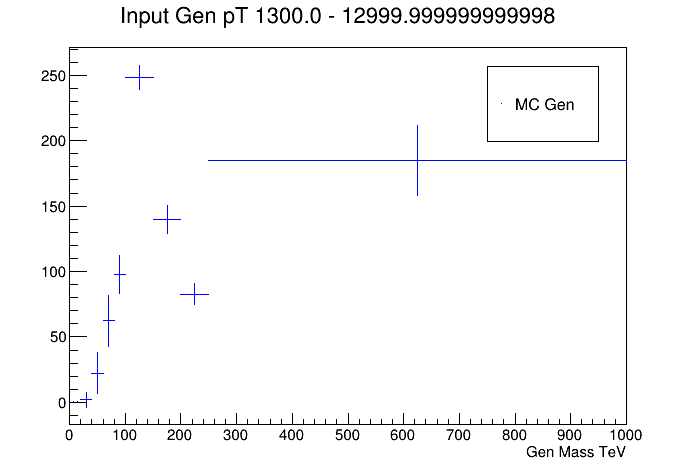

In [43]:
canvs = []
hists = []
for ipt in range(len(ptgen_edges)-1):
    ci = ROOT.TCanvas("c" + str(ipt), "c" + str(ipt))
    ci.cd()
    hcopy = ROOT.TH1D("inputGenPt" + str(ipt), "Input Gen pT " + str(ptgen_edges[ipt]) +" - " +str(ptgen_edges[ipt+1]), len(mgen_edges)-1, mgen_edges)
    hcopy_M = ROOT.TH1D("inputMATRIXGenPt" + str(ipt), "InputMATRIX Gen pT " + str(ptgen_edges[ipt]) +" - " +str(ptgen_edges[ipt+1]), len(mgen_edges)
-1, mgen_edges )
#        hcopy.Print("all") 
    canvs = []
    hists = []
    for im in range(len(mgen_edges)):
        hcopy.SetBinContent(im, o.GetBinContent(im+1+ipt*(len(mgen_edges)-1)))
        hcopy.SetBinError(im, oTotal.GetBinError(im+1+ipt*(len(mgen_edges)-1)))                                                                                                                   
        hcopy.SetLineColor(ROOT.kBlue)
        hcopy.SetMarkerColor(ROOT.kBlue)
        hcopy.GetXaxis().SetTitle("Gen Mass TeV")
    hcopy.Draw()                                                                                                                           
    leg1 = ROOT.TLegend(0.7, 0.7, 0.86, 0.86)                                                                                                    
    leg1.AddEntry(hcopy, "MC Gen", "p")
    leg1.Draw()
    ci.Draw()                                                                                                                                        
    hist[hcopy.GetName()]=hcopy
    ci.SaveAs(os_path+"UnfoldedClosure_ungroomed_allUnc_pt"+str(ptgen_edges[ipt])+"_"+year+".png")
    canvs.append(ci)
    hists.append(hcopy)
print(hists)